Sri

Project goal: Classify website as a phlishing or not; 
Author - Srinvasa Raghavan Partha sarathy

# Project Task: Week 1

- Exploratory Data Analysis:
- Each sample has 32 features ranging from -1,0,1. Explore the data using histogram, heatmaps. 
- Determine the number of samples present in the data, unique elements in all the features. 
- Check if there is any null value in any features. 
- Correlation of features and feature selection:
- Next, we have to find if there are any correlated features present in the data. Remove the feature which might be correlated with some threshold.

Import packages

In [1]:
import numpy as np
import pandas as pd
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import calendar
import warnings
from sklearn import metrics

Input data set file as a data frame

In [2]:
# Read csv files into df data frame. 
df = pd.read_csv('dataset.csv')
print(df.shape)

(11055, 32)


Perform EDA

In [3]:
print(df.head())
print(df.tail())
print(df.columns)
print(df.describe())

   index  having_IPhaving_IP_Address  URLURL_Length  Shortining_Service  \
0      1                          -1              1                   1   
1      2                           1              1                   1   
2      3                           1              0                   1   
3      4                           1              0                   1   
4      5                           1              0                  -1   

   having_At_Symbol  double_slash_redirecting  Prefix_Suffix  \
0                 1                        -1             -1   
1                 1                         1             -1   
2                 1                         1             -1   
3                 1                         1             -1   
4                 1                         1             -1   

   having_Sub_Domain  SSLfinal_State  Domain_registeration_length  ...  \
0                 -1              -1                           -1  ...   
1               

In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11055 entries, 0 to 11054
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   index                        11055 non-null  int64
 1   having_IPhaving_IP_Address   11055 non-null  int64
 2   URLURL_Length                11055 non-null  int64
 3   Shortining_Service           11055 non-null  int64
 4   having_At_Symbol             11055 non-null  int64
 5   double_slash_redirecting     11055 non-null  int64
 6   Prefix_Suffix                11055 non-null  int64
 7   having_Sub_Domain            11055 non-null  int64
 8   SSLfinal_State               11055 non-null  int64
 9   Domain_registeration_length  11055 non-null  int64
 10  Favicon                      11055 non-null  int64
 11  port                         11055 non-null  int64
 12  HTTPS_token                  11055 non-null  int64
 13  Request_URL                  11055 non-null  i

Task: Check if any column is having null values

In [5]:
df.isna().sum()

index                          0
having_IPhaving_IP_Address     0
URLURL_Length                  0
Shortining_Service             0
having_At_Symbol               0
double_slash_redirecting       0
Prefix_Suffix                  0
having_Sub_Domain              0
SSLfinal_State                 0
Domain_registeration_length    0
Favicon                        0
port                           0
HTTPS_token                    0
Request_URL                    0
URL_of_Anchor                  0
Links_in_tags                  0
SFH                            0
Submitting_to_email            0
Abnormal_URL                   0
Redirect                       0
on_mouseover                   0
RightClick                     0
popUpWidnow                    0
Iframe                         0
age_of_domain                  0
DNSRecord                      0
web_traffic                    0
Page_Rank                      0
Google_Index                   0
Links_pointing_to_page         0
Statistica

Inference: All columns have legit values that can be used.

Task: If for any column(s), the variance is equal to zero, then you need to remove those variable(s).

In [6]:
print('Train data null-',df.isnull().sum().any())

Train data null- False


In [7]:
# Use this to check if there are some columns with 'zero' variance or std deviation 
df.std()

index                          3191.447947
having_IPhaving_IP_Address        0.949534
URLURL_Length                     0.766095
Shortining_Service                0.673998
having_At_Symbol                  0.713598
double_slash_redirecting          0.671011
Prefix_Suffix                     0.678139
having_Sub_Domain                 0.817518
SSLfinal_State                    0.911892
Domain_registeration_length       0.941629
Favicon                           0.777777
port                              0.685324
HTTPS_token                       0.737779
Request_URL                       0.982444
URL_of_Anchor                     0.715138
Links_in_tags                     0.763973
SFH                               0.759143
Submitting_to_email               0.772021
Abnormal_URL                      0.708949
Redirect                          0.319872
on_mouseover                      0.647490
RightClick                        0.405991
popUpWidnow                       0.789818
Iframe     

Note: No column has zero variance; That means, all columns have legit data

In [8]:
# Drop the index column since acts as a primary key and has no significance in EDA and model building
df = df.drop(columns=['index'])

In [9]:
### Method number 1 to eliminate columns with zero variance or standard deviation
cols = df.select_dtypes([np.number]).columns
std = df[cols].std()
cols_to_drop = std[std==0].index
print(cols_to_drop)
df.shape

Index([], dtype='object')


(11055, 31)

In [10]:
### Method number 2 to eliminate columns with zero variance or standard deviation
df = df.drop(df.std()[(df.std() == 0)].index, axis=1)
df.shape

(11055, 31)

Inference: There are 0 columns / features that have no variations (Variance = Std deviation = 0); Hence no column is potential to be dropped from modeling, except 'index'

Task: Check for null and unique values for test and train sets.

In [11]:
for col in df.columns: 

  print(col,df[col].dtypes) 

  print(df[col].unique()) 

  #print(df[col].value_counts()) 

  print(sum(df[col].isna())) 

  print('---------------------') 

having_IPhaving_IP_Address int64
[-1  1]
0
---------------------
URLURL_Length int64
[ 1  0 -1]
0
---------------------
Shortining_Service int64
[ 1 -1]
0
---------------------
having_At_Symbol int64
[ 1 -1]
0
---------------------
double_slash_redirecting int64
[-1  1]
0
---------------------
Prefix_Suffix int64
[-1  1]
0
---------------------
having_Sub_Domain int64
[-1  0  1]
0
---------------------
SSLfinal_State int64
[-1  1  0]
0
---------------------
Domain_registeration_length int64
[-1  1]
0
---------------------
Favicon int64
[ 1 -1]
0
---------------------
port int64
[ 1 -1]
0
---------------------
HTTPS_token int64
[-1  1]
0
---------------------
Request_URL int64
[ 1 -1]
0
---------------------
URL_of_Anchor int64
[-1  0  1]
0
---------------------
Links_in_tags int64
[ 1 -1  0]
0
---------------------
SFH int64
[-1  1  0]
0
---------------------
Submitting_to_email int64
[-1  1]
0
---------------------
Abnormal_URL int64
[-1  1]
0
---------------------
Redirect int64
[0 1

Inference: There is no columns / features that has null. 

Task: Check if the data set has any Bias to particular class based on result

 1    6157
-1    4898
Name: Result, dtype: int64


/Users/sr_parthasarathy/opt/anaconda3/envs/py39_env/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Result', ylabel='count'>

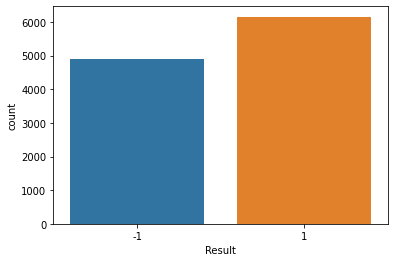

In [12]:
print(df['Result'].value_counts())
sns.countplot(df['Result'])

Inference: The data is balanced; There is not a significant difference between the count of the target variable values; There is no need to regularize / augment data

To even out the distribution while splitting the data into training & testing sets, we need to shuffle it. This even evades the case of overfitting while model training.

In [13]:
# shuffling the rows in the dataset so that when splitting the train and test set are equally distributed
df = df.sample(frac=1).reset_index(drop=True)
df.head()

,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,1,-1,1,1,1,-1,1,1,-1,-1,...,-1,1,1,1,1,-1,1,0,1,1
1,1,-1,1,1,1,-1,-1,-1,1,1,...,1,1,-1,-1,-1,-1,1,1,1,-1
2,1,-1,1,1,1,-1,1,1,-1,1,...,1,1,1,1,1,-1,-1,0,1,1
3,1,1,1,1,1,-1,0,1,-1,1,...,1,1,-1,1,1,-1,1,0,1,1
4,1,-1,1,1,1,-1,-1,1,-1,1,...,1,1,1,-1,1,-1,1,1,1,1


 1    6157
-1    4898
Name: Result, dtype: int64


/Users/sr_parthasarathy/opt/anaconda3/envs/py39_env/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Result', ylabel='count'>

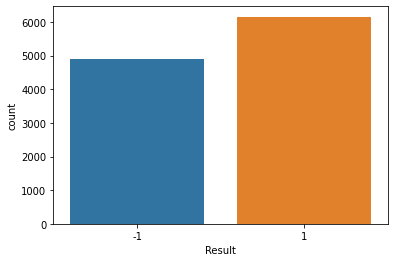

In [14]:
print(df['Result'].value_counts())
sns.countplot(df['Result'])

Inference: There is no major bias on data set

Task: To indentify and eliminate features that have very low correlation to Result and High correlation with other features

In [15]:
# Generate correlation matrix
print(df.corr())
import seaborn as sns
plt.figure(figsize =(10,10))

                             having_IPhaving_IP_Address  URLURL_Length  \
having_IPhaving_IP_Address                     1.000000      -0.052411   
URLURL_Length                                 -0.052411       1.000000   
Shortining_Service                             0.403461      -0.097881   
having_At_Symbol                               0.158699      -0.075108   
double_slash_redirecting                       0.397389      -0.081247   
Prefix_Suffix                                 -0.005257       0.055247   
having_Sub_Domain                             -0.080745       0.003997   
SSLfinal_State                                 0.071414       0.048754   
Domain_registeration_length                   -0.022739      -0.221892   
Favicon                                        0.087025      -0.042497   
port                                           0.060979       0.000323   
HTTPS_token                                    0.363534      -0.089383   
Request_URL                           

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<AxesSubplot:>

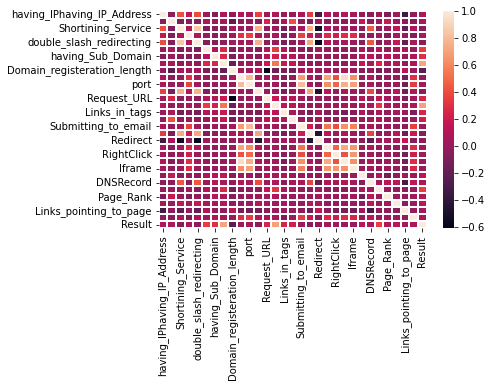

In [16]:
# Generate heatmap
sns.heatmap(df.corr(), linewidths=1.5)     

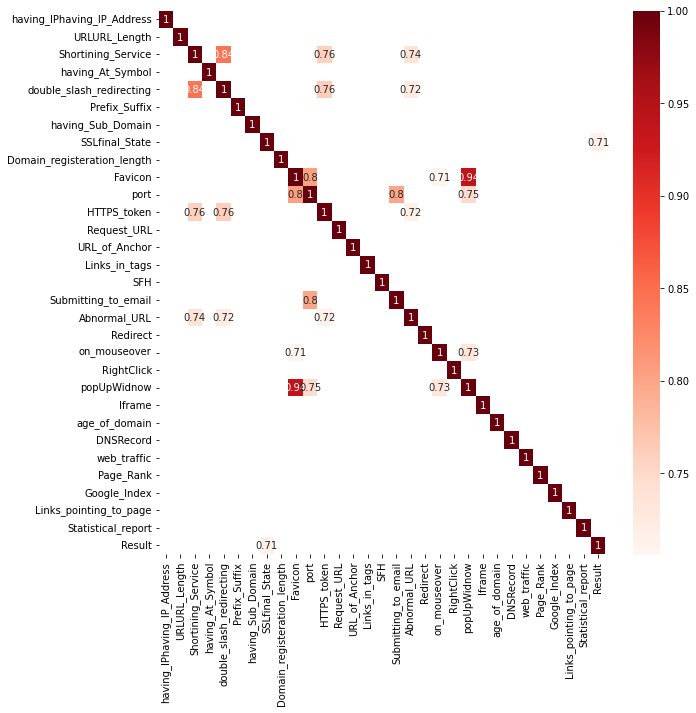

In [17]:
corr_matrix = df.corr()
plt.figure(figsize= (10, 10))
sns.heatmap(corr_matrix[np.abs(corr_matrix)>0.7], cmap=plt.cm.Reds, annot=True)
plt.show()

In [18]:
print(df.corr()['Result'].sort_values())      
# Print correlation with target variable

Domain_registeration_length   -0.225789
Shortining_Service            -0.067966
Abnormal_URL                  -0.060488
HTTPS_token                   -0.039854
double_slash_redirecting      -0.038608
Redirect                      -0.020113
Iframe                        -0.003394
Favicon                       -0.000280
popUpWidnow                    0.000086
RightClick                     0.012653
Submitting_to_email            0.018249
Links_pointing_to_page         0.032574
port                           0.036419
on_mouseover                   0.041838
having_At_Symbol               0.052948
URLURL_Length                  0.057430
DNSRecord                      0.075718
Statistical_report             0.079857
having_IPhaving_IP_Address     0.094160
Page_Rank                      0.104645
age_of_domain                  0.121496
Google_Index                   0.128950
SFH                            0.221419
Links_in_tags                  0.248229
Request_URL                    0.253372


In [19]:
# Remove features having correlation coefficient between +/- 0.04 with Result
# Remove features having correlation coefficient > 0.75 with other features & having least corr with Result
print("Original columns count:",len(df.columns))
df.drop(['Favicon','Iframe','Redirect','popUpWidnow','RightClick','Links_pointing_to_page','Submitting_to_email','double_slash_redirecting','HTTPS_token','port'],axis=1,inplace=True)
print("Post drop columns:",len(df.columns))

Original columns count: 31
Post drop columns: 21


# Project Task: Week 2

- Building Classification Model
- Finally, build a robust classification system that classifies whether the URL sample is a phishing site or not.
- Build classification models using a binary classifier to detect malicious or phishing URLs.
- Illustrate the diagnostic ability of this binary classifier by plotting the ROC curve.
- Validate the accuracy of data by the K-Fold cross-validation technique.
- The final output consists of the model, which will give maximum accuracy on the validation dataset with selected attributes.

In [20]:
# Prepare data for models
df['Result'] = np.where(df['Result']==-1, 0, df['Result'])
target = df['Result'].values
predictors = df.drop(['Result'], axis = 1)
predictors.shape, target.shape


((11055, 20), (11055,))

In [21]:
# Splitting the dataset into train and test sets: 75-25 split
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(predictors, target, 
                                                    test_size = 0.25, random_state = 12)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((8291, 20), (2764, 20), (8291,), (2764,))

Machine Learning models and training

This data set comes under classification problem + Supervised; Result is the desired output and classified as phishing (1) or legitimate (-1). 
The supervised machine learning models (classification) considered to train the dataset in this notebook are:
Logistic Regression
Naive Bayes
Support Vector Machines (SVM)
N-Nearest Neighbours
Decision Tree
Random Forest
XGBoost

In [22]:
#importing packages for metrics
from sklearn import metrics
from sklearn.metrics import accuracy_score

Modelling using Popular Binary model: Logistic Regression

In [23]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr = lr.fit(X_train,Y_train)
Y_pred_lr = lr.predict(X_test)
Y_pred_lr.shape

(2764,)

In [24]:
# generate evaluation metrics
print("Accuracy: ", metrics.accuracy_score(Y_test, Y_pred_lr))
print("Confusion Matrix:", metrics.confusion_matrix(Y_test,Y_pred_lr))
#Classification Report
print("Classification Report:", metrics.classification_report(Y_test,Y_pred_lr))

Accuracy:  0.9225759768451519
Confusion Matrix: [[1093  141]
 [  73 1457]]
Classification Report:               precision    recall  f1-score   support

           0       0.94      0.89      0.91      1234
           1       0.91      0.95      0.93      1530

    accuracy                           0.92      2764
   macro avg       0.92      0.92      0.92      2764
weighted avg       0.92      0.92      0.92      2764



In [25]:
Y_pred_prob = lr.predict_proba(X_test) # Predicted Probabilities for the test class
 # 1st Column indicates probabilites for Class 0 and 2nd column for Class 1
#Extracting probabilities for the positive class
Y_pred_prob = Y_pred_prob[:,1]
Y_pred_prob

array([0.00324942, 0.99987911, 0.98308761, ..., 0.98639674, 0.9014615 ,
       0.88491786])

In [26]:
# extract false positive, true positive rate
fpr, tpr, thresholds = metrics.roc_curve(Y_test,Y_pred_prob)
roc_auc = metrics.auc(fpr, tpr)
print(f"Area under the ROC curve : {roc_auc}",)

Area under the ROC curve : 0.976239658478194


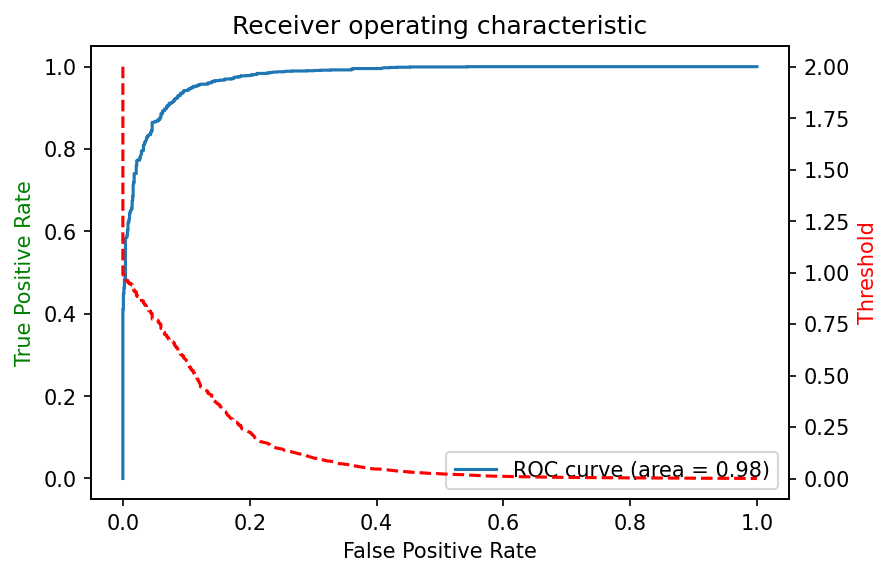

In [27]:
plt.figure(dpi=150)
plt.plot(fpr, tpr, label=f"ROC curve (area = {roc_auc:0.2f})")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate',color='g')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
ax2 = plt.gca().twinx()
ax2.plot(fpr, thresholds, markeredgecolor='r',linestyle='dashed', color='r')
ax2.set_ylabel('Threshold',color='r')
plt.show()

In [28]:
roc = pd.DataFrame({'fpr':fpr,'tpr(Sensitivity/Recall)':tpr,'1-fpr (TNR/Specificity)' : (1-fpr), \
                       'threshold':thresholds})
#By looking at the above graph,trying to find a sweet spot between high tpr and low 
# fpr, by varying
# threshold between 0.4 and 0.5
print(roc.loc[((roc['threshold']>0.4) & (roc['threshold'] < 0.6)),:])

          fpr  tpr(Sensitivity/Recall)  1-fpr (TNR/Specificity)  threshold
529  0.093193                 0.935948                 0.906807   0.599403
530  0.094814                 0.935948                 0.905186   0.597738
531  0.094814                 0.938562                 0.905186   0.592577
532  0.095624                 0.938562                 0.904376   0.592421
533  0.095624                 0.939869                 0.904376   0.588930
534  0.095624                 0.940523                 0.904376   0.588496
535  0.096434                 0.940523                 0.903566   0.586669
536  0.096434                 0.941830                 0.903566   0.584359
537  0.098865                 0.941830                 0.901135   0.578160
538  0.100486                 0.941830                 0.899514   0.573149
539  0.100486                 0.942484                 0.899514   0.571186
540  0.102917                 0.942484                 0.897083   0.564011
541  0.102917            

By default, model predicts Class 1 (rounds predicted probability to 1) whenever probability > 0.5 and Class -1 (rounds predicted probability to 0) whenever prob < 0.5, thereby implying a set threshold of 0.5. Recall was ~94% that verifies above statement.
So, What threshold should we choose?
it depends on what matters to us. False Positives i.e. wrongly predicting Phishing for a legit site will not matter as much as False Negative i.e. predicting legit for a Phishing site. So, we would aim to reduce False Negatives (Increase Recall/True Positive Rate) even if it costs us high False Positives ( and thus reduces Precision). A threshold of 0.60, gives us TPR(Recall of 96.6%) at a FPR of 13%. Since there not a big difference on TPR, we could just let threshold be at 0.5.

In [29]:
score_lr = round(accuracy_score(Y_pred_lr,Y_test)*100,2)
print("The accuracy score achieved using Logistic Regression is: "+str(score_lr)+" %")

The accuracy score achieved using Logistic Regression is: 92.26 %


In [30]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import train_test_split
score_lr_kfold = round((cross_val_score(lr,predictors,target,cv=10).mean())*100,2)
print ("The accuracy score achieved using Logistic Regression + K-fold is: "+str(score_lr_kfold)+" %")

The accuracy score achieved using Logistic Regression + K-fold is: 92.38 %


Modelling using Popular Binary model: Naive Bayes

In [31]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb = nb.fit(X_train,Y_train)
Y_pred_nb = nb.predict(X_test)
print("Shape of Y_pred_nb:", Y_pred_nb.shape)
score_nb = round(accuracy_score(Y_pred_nb,Y_test)*100,2)
print("The accuracy score achieved using Gaussian Naive Bayes is: "+str(score_nb)+" %")

Shape of Y_pred_nb: (2764,)
The accuracy score achieved using Gaussian Naive Bayes is: 60.53 %


In [32]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import train_test_split
score_nb_kfold = round((cross_val_score(nb,predictors,target,cv=10).mean())*100,2)
print ("The accuracy score achieved using Gaussian Naive Bayes + K-fold is: "+str(score_nb_kfold)+" %")

The accuracy score achieved using Gaussian Naive Bayes + K-fold is: 60.06 %


Modelling using Popular Binary model: SVM

In [33]:
from sklearn import svm
sv = svm.SVC(kernel='linear')
sv = sv.fit(X_train, Y_train)
Y_pred_svm = sv.predict(X_test)
print("Shape of Y_pred_svm:", Y_pred_svm.shape)
score_svm = round(accuracy_score(Y_pred_svm,Y_test)*100,2)
print("The accuracy score achieved using Linear SVM is: "+str(score_svm)+" %")

Shape of Y_pred_svm: (2764,)
The accuracy score achieved using Linear SVM is: 91.64 %


In [34]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import train_test_split
score_svm_kfold = round((cross_val_score(sv,predictors,target,cv=10).mean())*100,2)
print ("The accuracy score achieved using Linear SVM + K-fold is: "+str(score_svm_kfold)+" %")

The accuracy score achieved using Linear SVM + K-fold is: 92.1 %


Modelling using Popular Binary model: K Neighbors KNN

In [35]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7)
knn = knn.fit(X_train,Y_train)
Y_pred_knn=knn.predict(X_test)
print("Shape of Y_pred_knn:", Y_pred_knn.shape)
score_knn = round(accuracy_score(Y_pred_knn,Y_test)*100,2)
print("The accuracy score achieved using KNN is: "+str(score_knn)+" %")

Shape of Y_pred_knn: (2764,)
The accuracy score achieved using KNN is: 93.89 %


In [36]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import train_test_split
score_knn_kfold = round((cross_val_score(knn,predictors,target,cv=10).mean())*100,2)
print ("The accuracy score achieved using KNN + K-fold is: "+str(score_knn_kfold)+" %")

The accuracy score achieved using KNN + K-fold is: 93.62 %


Modelling using Popular Binary model: Decision tree

In [37]:
from sklearn.tree import DecisionTreeClassifier
max_accuracy = 0
for x in range(100):
    dt = DecisionTreeClassifier(random_state=x)
    dt = dt.fit(X_train,Y_train)
    Y_pred_dt = dt.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_dt,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x

dt = DecisionTreeClassifier(random_state=best_x)
dt = dt.fit(X_train,Y_train)
Y_pred_dt = dt.predict(X_test)
print("Shape of Y_pred_decision_tree:", Y_pred_dt.shape)
score_dt = round(accuracy_score(Y_pred_dt,Y_test)*100,2)
print("The accuracy score achieved using Decision Tree is: "+str(score_dt)+" %")

Shape of Y_pred_decision_tree: (2764,)
The accuracy score achieved using Decision Tree is: 95.8 %


In [38]:
from sklearn import tree
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import train_test_split
Tree = tree.DecisionTreeClassifier()
Tree = Tree.fit(predictors,target)

score_dt_kfold = round((cross_val_score(Tree,predictors,target,cv=10).mean())*100,2)
print ("The accuracy score achieved using Decision Tree + K-fold is: "+str(score_dt_kfold)+" %")

The accuracy score achieved using Decision Tree + K-fold is: 95.83 %


Modelling using Popular Binary model: Random Forest

In [39]:
from sklearn.ensemble import RandomForestClassifier
max_accuracy = 0
for x in range(100):
    rf = RandomForestClassifier(random_state=x)
    rf = rf.fit(X_train,Y_train)
    Y_pred_rf = rf.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_rf,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
        
rf = RandomForestClassifier(random_state=best_x)
rf = rf.fit(X_train,Y_train)
Y_pred_rf = rf.predict(X_test)
print("Shape of Y_pred_RandomForest:", Y_pred_rf.shape)
score_rf = round(accuracy_score(Y_pred_rf,Y_test)*100,2)

print("The accuracy score achieved using Random Forest is: "+str(score_rf)+" %")

Shape of Y_pred_RandomForest: (2764,)
The accuracy score achieved using Random Forest is: 96.67 %


In [40]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import train_test_split
score_rf_kfold = round((cross_val_score(rf,predictors,target,cv=10).mean())*100,2)
print ("The accuracy score achieved using Random Forest + K-fold is: "+str(score_rf_kfold)+" %")

The accuracy score achieved using Random Forest + K-fold is: 96.58 %


Modelling using Popular Binary model: XGBoost

In [41]:
!pip install xgboost 
from sklearn.model_selection import KFold
#from xgboost import XGBClassifier
import xgboost as xgb

# Replacing -1 with 0 in the target variable
df['Result'] = np.where(df['Result']==-1, 0, df['Result'])

xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
xgb_model.fit(X_train, Y_train)

Y_pred_xgb = xgb_model.predict(X_test)
Y_pred_xgb.shape
print("Shape of Y_pred_XGBoost:", Y_pred_xgb.shape)
score_xgb = round(accuracy_score(Y_pred_xgb,Y_test)*100,2)
print("The accuracy score achieved using XGBoost is: "+str(score_xgb)+" %")

Shape of Y_pred_XGBoost: (2764,)
The accuracy score achieved using XGBoost is: 96.16 %


In [42]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import train_test_split
score_xgb_kfold = round((cross_val_score(xgb_model,predictors,target,cv=10).mean())*100,2)
print ("The accuracy score achieved using XGBoost + K-fold is: "+str(score_xgb_kfold)+" %")

The accuracy score achieved using XGBoost + K-fold is: 96.35 %


In [43]:
scores = [score_nb,score_svm,score_lr,score_knn,score_dt,score_xgb,score_rf]
algorithms = ["Naive Bayes","Support Vector Machine","Logistic Regression","K-Nearest Neighbors","Decision Tree","XGBoost","Random Forest"]    
print("------------- Accuracy scores of Binary Classifiers ---------------\n")
for i in range(len(algorithms)):
    print("The accuracy score achieved using "+algorithms[i]+" is: "+str(scores[i])+" %")
    
scores_kfold = [score_nb_kfold,score_svm_kfold,score_lr_kfold,score_knn_kfold,score_dt_kfold,score_xgb_kfold,score_rf_kfold]
algorithms_kfold = ["Naive Bayes KF","Support Vector Machine KF","Logistic Regression KF","K-Nearest Neighbors KF","Decision Tree KF","XGBoost KF","Random Forest KF"]    
print("\n------------- Accuracy scores of Binary Classifiers with K-fold---------------\n")

for i in range(len(algorithms_kfold)):
    print("The accuracy score achieved using "+algorithms_kfold[i]+" is: "+str(scores_kfold[i])+" %")

------------- Accuracy scores of Binary Classifiers ---------------

The accuracy score achieved using Naive Bayes is: 60.53 %
The accuracy score achieved using Support Vector Machine is: 91.64 %
The accuracy score achieved using Logistic Regression is: 92.26 %
The accuracy score achieved using K-Nearest Neighbors is: 93.89 %
The accuracy score achieved using Decision Tree is: 95.8 %
The accuracy score achieved using XGBoost is: 96.16 %
The accuracy score achieved using Random Forest is: 96.67 %

------------- Accuracy scores of Binary Classifiers with K-fold---------------

The accuracy score achieved using Naive Bayes KF is: 60.06 %
The accuracy score achieved using Support Vector Machine KF is: 92.1 %
The accuracy score achieved using Logistic Regression KF is: 92.38 %
The accuracy score achieved using K-Nearest Neighbors KF is: 93.62 %
The accuracy score achieved using Decision Tree KF is: 95.83 %
The accuracy score achieved using XGBoost KF is: 96.35 %
The accuracy score achieved 

/Users/sr_parthasarathy/opt/anaconda3/envs/py39_env/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Algorithms', ylabel='Accuracy score'>

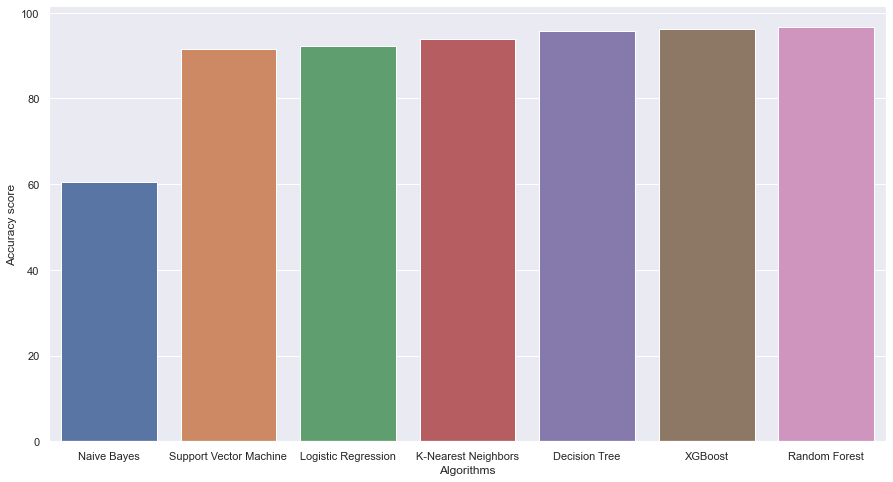

In [44]:
sns.set(rc={'figure.figsize':(15,8)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")

sns.barplot(algorithms,scores)

/Users/sr_parthasarathy/opt/anaconda3/envs/py39_env/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Algorithms with K-Fold', ylabel='Accuracy score'>

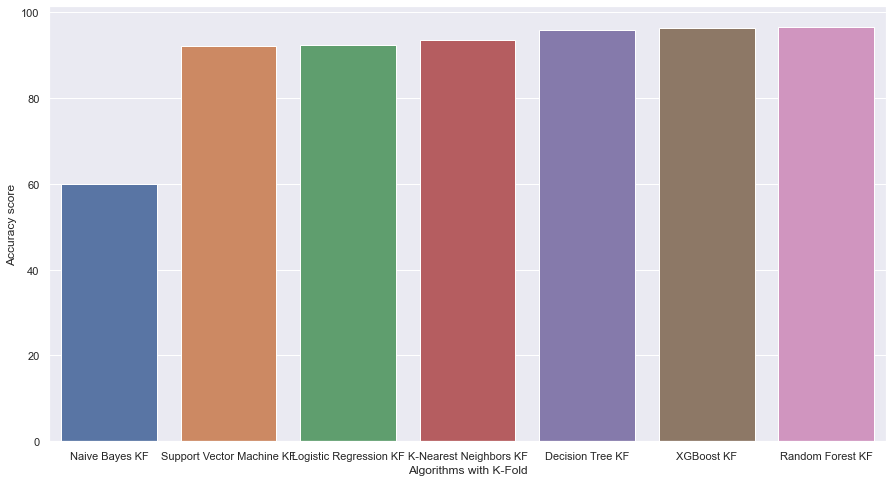

In [45]:
sns.set(rc={'figure.figsize':(15,8)})
plt.xlabel("Algorithms with K-Fold")
plt.ylabel("Accuracy score")

sns.barplot(algorithms_kfold,scores_kfold)

# Conclusion: 
- Best accuracy of 96.63% can be achieved using Random Forest algo, closely followed by XGBoost and Decision Tree
- With this accuracy, there is a decent confidence that the Random Forest model (w/ KFold) should be able to detect any URL correctly as Phishing or Legit. 
- Attributes (random_state) for Random Forest, Decision tree were optimized instead choosing some number in random. 
- There is no major different with K-Fold (split size = 10).
- Result is inline with the nature of data and Binary classification model. 